1. LOAD THE DATA

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [144]:
# load dataframe 1 - consists of movie titles
movie_titles_df = pd.read_csv("Movie_Id_Titles")
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
# load dataframe 2 - consists of movie ratings
movie_ratings_df = pd.read_csv("u.data", sep = "\t", names = ['user_id','item_id','rating','timestamp'])

In [14]:
movie_ratings_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [15]:
# drop timestamp column as it is not needed
movie_ratings_df.drop('timestamp', inplace = True, axis = 1)
movie_ratings_df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [16]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


In [17]:
movie_ratings_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [19]:
# merge both dataframes together on the basis of item_id
merged_df = pd.merge(movie_titles_df, movie_ratings_df, on="item_id")
merged_df.head()

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [21]:
len(merged_df)

100003

In [22]:
merged_df.shape

(100003, 4)

2. VISUALIZE THE DATA

In [44]:
merged_df.groupby("title")['rating'].describe().head()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.0,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.0,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.0,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.0,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.0,3.0,4.0,5.0


In [28]:
mean_vals = merged_df.groupby("title")['rating'].describe()['mean']

In [29]:
count_vals = merged_df.groupby("title")['rating'].describe()['count']

In [31]:
mean_vals

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [46]:
count_vals

title
'Til There Was You (1997)                                     9.0
1-900 (1994)                                                  5.0
101 Dalmatians (1996)                                       109.0
12 Angry Men (1957)                                         125.0
187 (1997)                                                   41.0
2 Days in the Valley (1996)                                  93.0
20,000 Leagues Under the Sea (1954)                          72.0
2001: A Space Odyssey (1968)                                259.0
3 Ninjas: High Noon At Mega Mountain (1998)                   5.0
39 Steps, The (1935)                                         59.0
8 1/2 (1963)                                                 38.0
8 Heads in a Duffel Bag (1997)                                4.0
8 Seconds (1994)                                              4.0
A Chef in Love (1996)                                         8.0
Above the Rim (1994)                                          5.0
Abso

In [33]:
type(count_vals), type(mean_vals)

(pandas.core.series.Series, pandas.core.series.Series)

In [34]:
count_vals.shape

(1664,)

In [35]:
mean_vals.shape

(1664,)

In [36]:
mean_count_concat = pd.concat([count_vals, mean_vals], axis = 1)

In [38]:
mean_count_concat.head()

,count,mean
title,,
'Til There Was You (1997),9.0,2.333333
1-900 (1994),5.0,2.600000
101 Dalmatians (1996),109.0,2.908257
12 Angry Men (1957),125.0,4.344000
187 (1997),41.0,3.024390


In [39]:
mean_count_concat.columns

Index(['count', 'mean'], dtype='object')

In [41]:
mean_count_concat.reset_index().head()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390


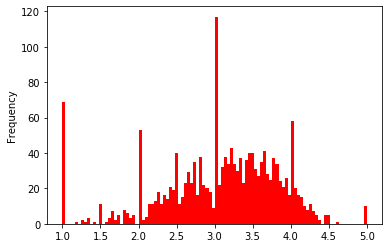

In [42]:
mean_count_concat['mean'].plot(bins = 100, kind = 'hist',color ='r')
# to show the frequency of mean rating of different movies
# maximum movies have mean rating 3
# highest rating = around 5

In [50]:
# to see the highest rated movies - no of ratings are not very large for these
mean_count_concat[mean_count_concat['mean'] == 5]

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


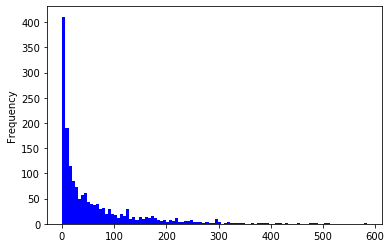

In [49]:
mean_count_concat['count'].plot(bins = 100, kind = 'hist',color ='b')
# no of ratings of different movies vs how frequently that no occurs

In [52]:
# movie with highest no of ratings (NOT necessarily high ratings)
mean_count_concat.sort_values('count', ascending = False).head(20)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


3. PERFORM ITEM BASED COLLABORATIVE FILTERING ON 1 ITEM

In [58]:
movie_matrix = merged_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
# rearrange the dataframe

In [59]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
titanic = movie_matrix['Titanic (1997)']

In [61]:
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     4.0
14     2.0
15     NaN
16     NaN
17     NaN
18     NaN
19     2.0
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     5.0
27     NaN
28     NaN
29     NaN
      ... 
914    3.0
915    4.0
916    NaN
917    NaN
918    NaN
919    5.0
920    5.0
921    5.0
922    NaN
923    NaN
924    4.0
925    NaN
926    3.0
927    NaN
928    NaN
929    NaN
930    NaN
931    4.0
932    NaN
933    NaN
934    3.0
935    5.0
936    4.0
937    NaN
938    5.0
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [68]:
# calculate correlations of other movies with titanic on the basis of rating
titanic_correlations = pd.DataFrame(movie_matrix.corrwith(titanic), columns = ['Correlation'])

In [69]:
titanic_correlations.head()

,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654


In [70]:
titanic_correlations = titanic_correlations.join(mean_count_concat['count'])

In [71]:
titanic_correlations.head()

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0


In [72]:
len(titanic_correlations)

1664

In [74]:
titanic_correlations.info() # contains null values - simply drop them

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
Correlation    1356 non-null float64
count          1664 non-null float64
dtypes: float64(2)
memory usage: 80.5+ KB


In [76]:
titanic_correlations.dropna(inplace = True)

In [78]:
titanic_correlations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 'Til There Was You (1997) to Young Poisoner's Handbook, The (1995)
Data columns (total 2 columns):
Correlation    1356 non-null float64
count          1356 non-null float64
dtypes: float64(2)
memory usage: 26.5+ KB


In [85]:
# sort the correlations to get the movies with highest correlation first
titanic_correlations.sort_values('Correlation', ascending = False)

,Correlation,count
title,,
"Newton Boys, The (1998)",1.0,4.0
"Pest, The (1997)",1.0,8.0
"Amazing Panda Adventure, The (1995)",1.0,10.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
Hideaway (1995),1.0,9.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
Nadja (1994),1.0,8.0
Hearts and Minds (1996),1.0,5.0


In [99]:
# get the sorted correlations for movies with no of ratings greater than 80
cor1 = titanic_correlations[titanic_correlations['count'] > 80].sort_values("Correlation", ascending = False).head(20)

In [102]:
cor1

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
"Last of the Mohicans, The (1992)",0.427239,128.0
Outbreak (1995),0.426237,104.0
Demolition Man (1993),0.411489,92.0


In [103]:
# predict first few movies of the dataframe with considerable count value
# eg - The River Wild

4. CREATE AN ITEM BASED COLLABORATIVE FILTER ON ENTIRE DATASET

In [106]:
all_correlations = movie_matrix.corr(method = 'pearson', min_periods = 80)
# Obtain the correlations between all movies in the dataframe

In [107]:
all_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,0.178848,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,-0.001307,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# create a custom user rating dataframe
names = ['Mark of Zorro, The (1940)','Air Force One (1997)']
ratings = [4.0, 4.5]

In [112]:
user_ratings = pd.DataFrame({'Movie':names,'Rating':ratings})
user_ratings

,Movie,Rating
0,"Mark of Zorro, The (1940)",4.0
1,Air Force One (1997),4.5


In [131]:
similar_movies_list = pd.Series()
for i in range(0, len(user_ratings)):
    similar_movie = all_correlations[user_ratings['Movie'][i]].dropna()
    #print(similar_movie)
    similar_movie = similar_movie.map(lambda x: x * user_ratings['Rating'][i]) # Scale the similarity by user ratings
    similar_movies_list = similar_movies_list.append(similar_movie)

In [134]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print (similar_movies_list.head(10))

Air Force One (1997)                4.500000
Hunt for Red October, The (1990)    2.494724
Murder at 1600 (1997)               2.317078
Eraser (1996)                       2.252728
Rock, The (1996)                    2.220939
Long Kiss Goodnight, The (1996)     2.206049
Twister (1996)                      2.096076
Peacemaker, The (1997)              2.089140
In the Line of Fire (1993)          2.017081
Top Gun (1986)                      1.942930
dtype: float64


5. CREATE A FUNCTION TO PASS IN MOVIES LIST AND RATINGS LIST AND GET BACK TOP 10 MOVIES

In [136]:
def get_similar_movies(names, ratings):
    user_ratings = pd.DataFrame({'Movie':names,'Rating':ratings})
    similar_movies_list = pd.Series()
    for i in range(0, len(user_ratings)):
        similar_movie = all_correlations[user_ratings['Movie'][i]].dropna()
        similar_movie = similar_movie.map(lambda x: x * user_ratings['Rating'][i]) # Scale the similarity by user ratings
        similar_movies_list = similar_movies_list.append(similar_movie)
    similar_movies_list.sort_values(inplace = True, ascending = False)
    return similar_movies_list.head(10)

TESTING THE RECOMMENDER SYSTEM

In [142]:
# define input for testing the recommender system
names = ['101 Dalmatians (1996)','Toy Story (1995)','Aladdin (1992)']
ratings = [4.0,5.0, 5.0]

In [145]:
get_similar_movies(names, ratings)

Toy Story (1995)               5.000000
Aladdin (1992)                 5.000000
101 Dalmatians (1996)          4.000000
Craft, The (1996)              2.745498
Lion King, The (1994)          2.572198
Cinderella (1950)              2.405046
Mrs. Doubtfire (1993)          2.328598
Down Periscope (1996)          2.289975
Beauty and the Beast (1991)    2.214800
Mask, The (1994)               2.164274
dtype: float64

In [ ]:
# END